In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import cv2
import imghdr

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Loading data 

In [3]:
data_dir = '/content/gdrive/MyDrive/Data_CNN/train'
test_dir = '/content/gdrive/MyDrive/Data_CNN/test'
data = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/Data_CNN/train')
test = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/Data_CNN/test')

Found 5466 files belonging to 10 classes.
Found 1371 files belonging to 10 classes.


Pre-processing

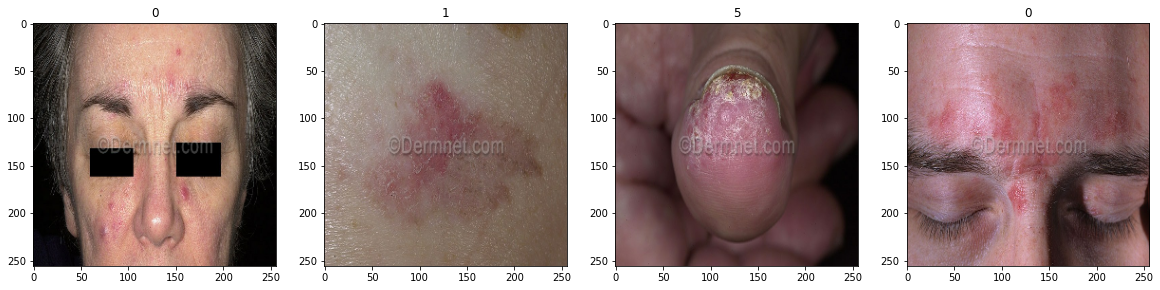

In [4]:
# training set
data = data.map(lambda x, y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

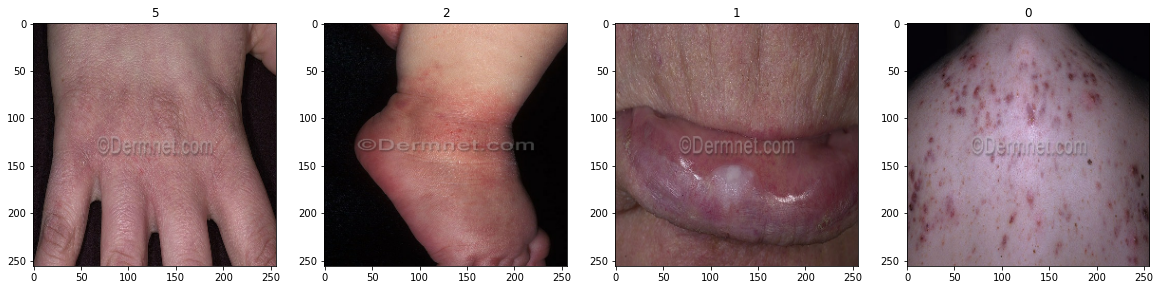

In [5]:
# testing set
test = test.map(lambda x, y: (x/255, y))
scaled_iterator = test.as_numpy_iterator()
batch = scaled_iterator.next()
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [6]:
len(data)

171

In [14]:
train_size = int(len(data)*.7) + 1
val_size  = int(len(data)*.3)
train_size + val_size

171

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
print(len(train),len(val))

120 51


Convolutional Deep learning

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(16,(3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Train

In [23]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
120/120 [==============================] - 239s 2s/step - loss: -81948848.0000 - accuracy: 0.2099 - val_loss: -644975744.0000 - val_accuracy: 0.2097
Epoch 2/20
120/120 [==============================] - 163s 1s/step - loss: -16063239168.0000 - accuracy: 0.2096 - val_loss: -59377172480.0000 - val_accuracy: 0.2073
Epoch 3/20
120/120 [==============================] - 164s 1s/step - loss: -272778608640.0000 - accuracy: 0.2096 - val_loss: -662882353152.0000 - val_accuracy: 0.2079
Epoch 4/20
120/120 [==============================] - 166s 1s/step - loss: -1780060258304.0000 - accuracy: 0.2083 - val_loss: -3490529411072.0000 - val_accuracy: 0.2066
Epoch 5/20
120/120 [==============================] - 154s 1s/step - loss: -6966203645952.0000 - accuracy: 0.2086 - val_loss: -11593893019648.0000 - val_accuracy: 0.2017
Epoch 6/20
120/120 [==============================] - 167s 1s/step - loss: -19677419929600.0000 - accuracy: 0.2096 - val_loss: -29757198565376.0000 - val_accuracy: 0.204

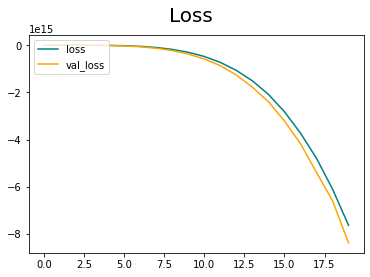

In [25]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

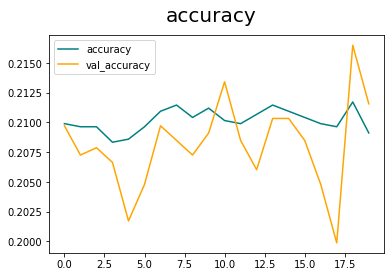

In [26]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

Testing

In [27]:
from tensorflow.keras.metrics import Precision, Recall , BinaryAccuracy

In [28]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [29]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

In [33]:
print("Precision:",pre.result().numpy(), "recall:",re.result().numpy(),"Accuracy:",acc.result().numpy())

Precision: 0.7724289 recall: 1.0 Accuracy: 0.21078274
